# Data Science Project: 2022 World Cup Predictions

Javier Canto & Alexei

# 1. Data Cleaning and Aggregation 

#### Importing all the libraries we are going to use.

In [1909]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import pylab as pyl

#### Reading our csv file with the data.

In [1910]:
dcsv = pd.read_csv('international_matches.csv')
df = pd.DataFrame(dcsv)

#### Showing our initial data frame.

In [1911]:
df

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0


#### Get familiar with the data we are working with.

In [1912]:
df.dtypes

date                              object
home_team                         object
away_team                         object
home_team_continent               object
away_team_continent               object
home_team_fifa_rank                int64
away_team_fifa_rank                int64
home_team_total_fifa_points        int64
away_team_total_fifa_points        int64
home_team_score                    int64
away_team_score                    int64
tournament                        object
city                              object
country                           object
neutral_location                    bool
shoot_out                         object
home_team_result                  object
home_team_goalkeeper_score       float64
away_team_goalkeeper_score       float64
home_team_mean_defense_score     float64
home_team_mean_offense_score     float64
home_team_mean_midfield_score    float64
away_team_mean_defense_score     float64
away_team_mean_offense_score     float64
away_team_mean_m

In [1913]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [1914]:
df.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


#### Check for null values

In [1915]:
df.isnull().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

#### Fill null values

In [1916]:
df['home_team_goalkeeper_score'] = round(df.groupby("home_team")["home_team_goalkeeper_score"].transform(lambda x: x.fillna(x.mean())))
df['away_team_goalkeeper_score'] = round(df.groupby("away_team")["away_team_goalkeeper_score"].transform(lambda x: x.fillna(x.mean())))

df['home_team_mean_defense_score'] = round(df.groupby('home_team')['home_team_mean_defense_score'].transform(lambda x : x.fillna(x.mean())))
df['away_team_mean_defense_score'] = round(df.groupby('away_team')['away_team_mean_defense_score'].transform(lambda x : x.fillna(x.mean())))

df['home_team_mean_offense_score'] = round(df.groupby('home_team')['home_team_mean_offense_score'].transform(lambda x : x.fillna(x.mean())))
df['away_team_mean_offense_score'] = round(df.groupby('away_team')['away_team_mean_offense_score'].transform(lambda x : x.fillna(x.mean())))

df['home_team_mean_midfield_score'] = round(df.groupby('home_team')['home_team_mean_midfield_score'].transform(lambda x : x.fillna(x.mean())))
df['away_team_mean_midfield_score'] = round(df.groupby('away_team')['away_team_mean_midfield_score'].transform(lambda x : x.fillna(x.mean())))

df.fillna(50, inplace = True)

df.isnull().sum()

date                             0
home_team                        0
away_team                        0
home_team_continent              0
away_team_continent              0
home_team_fifa_rank              0
away_team_fifa_rank              0
home_team_total_fifa_points      0
away_team_total_fifa_points      0
home_team_score                  0
away_team_score                  0
tournament                       0
city                             0
country                          0
neutral_location                 0
shoot_out                        0
home_team_result                 0
home_team_goalkeeper_score       0
away_team_goalkeeper_score       0
home_team_mean_defense_score     0
home_team_mean_offense_score     0
home_team_mean_midfield_score    0
away_team_mean_defense_score     0
away_team_mean_offense_score     0
away_team_mean_midfield_score    0
dtype: int64

#### Transform the data types from date (object) to date time.

In [1917]:
df["date"] = pd.to_datetime(df["date"]).astype('datetime64[ns]')
df.dtypes

date                             datetime64[ns]
home_team                                object
away_team                                object
home_team_continent                      object
away_team_continent                      object
home_team_fifa_rank                       int64
away_team_fifa_rank                       int64
home_team_total_fifa_points               int64
away_team_total_fifa_points               int64
home_team_score                           int64
away_team_score                           int64
tournament                               object
city                                     object
country                                  object
neutral_location                           bool
shoot_out                                object
home_team_result                         object
home_team_goalkeeper_score              float64
away_team_goalkeeper_score              float64
home_team_mean_defense_score            float64
home_team_mean_offense_score            

#### Show Top 10 FIFA ranking

In [1918]:
fifa_rank = df[['date','home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank']]
home = fifa_rank[['date', 'home_team', 'home_team_fifa_rank']].rename(columns={"home_team":"team", "home_team_fifa_rank":"rank"})
away = fifa_rank[['date', 'away_team', 'away_team_fifa_rank']].rename(columns={"away_team":"team", "away_team_fifa_rank":"rank"})
fifa_rank = pd.concat([home, away])
fifa_rank = fifa_rank.sort_values(['team', 'date'], ascending=[True, False])
last_rank = fifa_rank
fifa_rank_top10 = fifa_rank.groupby('team').first().sort_values('rank', ascending=True)[0:10].reset_index()
fifa_rank_top10

,team,date,rank
0,Brazil,2022-06-06,1
1,Belgium,2022-06-14,2
2,France,2022-06-13,3
3,Argentina,2022-06-05,4
4,England,2022-06-14,5
5,Italy,2022-06-14,6
6,Spain,2022-06-12,7
7,Portugal,2022-06-12,8
8,Mexico,2022-06-14,9
9,Netherlands,2022-06-14,10


#### Does play as a home team gives any advantage?

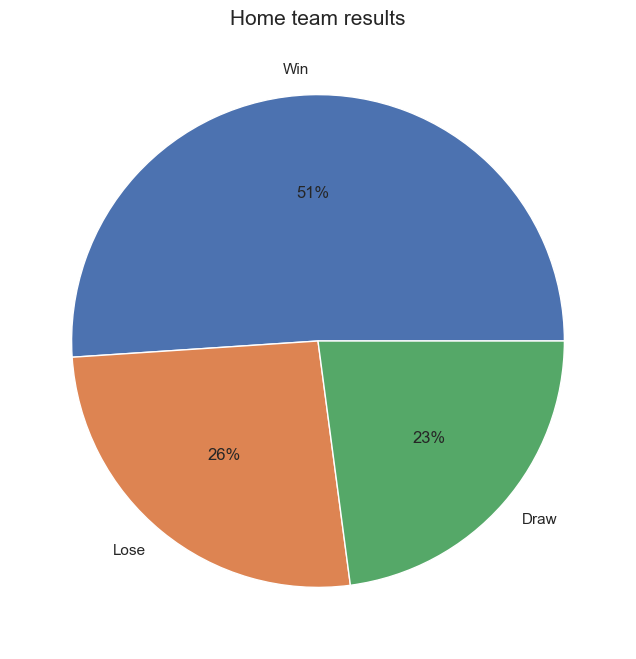

In [1919]:
home_team_advantage = df[df['neutral_location'] == False]['home_team_result'].value_counts(normalize = True)
fig, axes = plt.subplots(1, 1, figsize=(8,8))
ax = plt.pie(home_team_advantage  ,labels = ['Win', 'Lose', 'Draw'], autopct='%.0f%%')
plt.title('Home team results', fontsize = 15)
plt.show()

#### Does play in a neutral location affects the result?

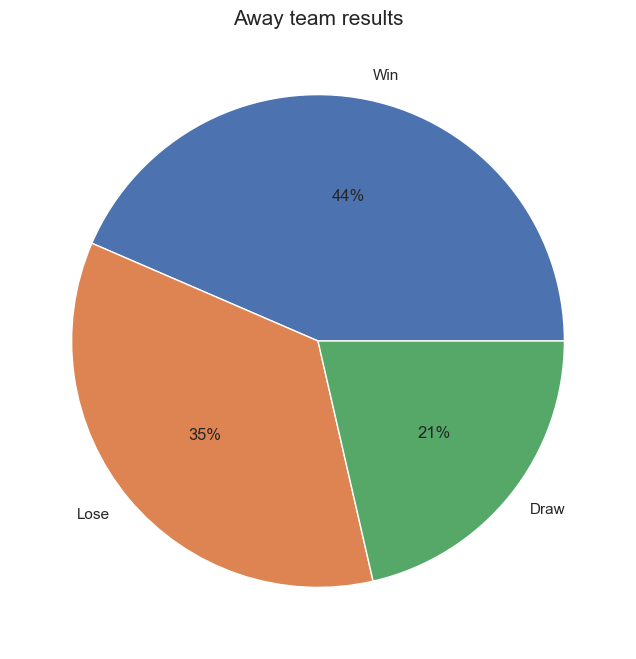

In [1920]:
home_team_advantage = df[df['neutral_location'] == True]['home_team_result'].value_counts(normalize = True)
fig, axes = plt.subplots(1, 1, figsize=(8,8))
ax = plt.pie(home_team_advantage  ,labels = ['Win', 'Lose', 'Draw'], autopct='%.0f%%')
plt.title('Away team results', fontsize = 15)
plt.show()

#### Mean, median, mode, s.max()-s.min(), quantiles and standard deviation from the goals made by the home and away team.

In [1921]:
s = df["home_team_score"]
s.mean(), s.median(), s.mode()

(1.6092136616362192,
 1.0,
 0    1
 Name: home_team_score, dtype: int64)

In [1922]:
s = df["home_team_score"]
s.max()-s.min(), s.quantile(0.75)-s.quantile(0.25), s.std()  	

(31, 2.0, 1.6301267123145093)

In [1923]:
s = df["away_team_score"]
s.mean(), s.median(), s.mode()

(1.0682663768237113,
 1.0,
 0    0
 Name: away_team_score, dtype: int64)

In [1924]:
s = df["away_team_score"]
s.max()-s.min(), s.quantile(0.75)-s.quantile(0.25), s.std()  	

(21, 2.0, 1.2639443128676153)

#### Let's query the World Cup games.

In [1925]:
x = df[["date", "home_team", "away_team", "home_team_result", "tournament"]].query("tournament == 'FIFA World Cup'")
x

,date,home_team,away_team,home_team_result,tournament
385,1994-06-17,Germany,Bolivia,Win,FIFA World Cup
386,1994-06-17,Spain,Korea Republic,Draw,FIFA World Cup
387,1994-06-18,Colombia,Romania,Lose,FIFA World Cup
388,1994-06-18,Italy,Republic of Ireland,Lose,FIFA World Cup
389,1994-06-18,USA,Switzerland,Draw,FIFA World Cup
...,...,...,...,...,...
20445,2018-07-07,Russia,Croatia,Lose,FIFA World Cup
20446,2018-07-10,France,Belgium,Win,FIFA World Cup
20447,2018-07-11,Croatia,England,Win,FIFA World Cup
20448,2018-07-14,Belgium,England,Win,FIFA World Cup


#### All the tourmants names in the data

In [1926]:
s = df["tournament"].unique()
s

array(['FIFA World Cup qualification', 'Friendly',
       'African Cup of Nations qualification', 'Amílcar Cabral Cup',
       'CFU Caribbean Cup qualification',
       'United Arab Emirates Friendship Tournament',
       'Malta International Tournament', 'Lunar New Year Cup',
       'African Cup of Nations', 'CFU Caribbean Cup',
       'UEFA Euro qualification', 'Kirin Cup', 'FIFA World Cup',
       'Oceania Nations Cup qualification', 'Baltic Cup', 'Gulf Cup',
       'Simba Tournament', 'CECAFA Cup', 'Confederations Cup',
       'Dynasty Cup', "King's Cup", 'Nehru Cup', 'SAFF Cup',
       'Copa Paz del Chaco', 'Korea Cup', 'USA Cup', 'Copa América',
       'Merdeka Tournament', 'South Pacific Games', 'UNCAF Cup',
       'Oceania Nations Cup', 'Windward Islands Tournament', 'Gold Cup',
       'AFC Asian Cup qualification', 'UEFA Euro', 'AFF Championship',
       'AFC Asian Cup', 'King Hassan II Tournament',
       'Cyprus International Tournament', 'Dunhill Cup',
       'COSAFA Cup qu

#### Count the numbers of names in the data.

In [1927]:
s = df["tournament"].nunique()
s

82

#### Number of games with penalties.

In [1928]:
df['Penalties'] = df['shoot_out'].map( {'Yes': 1, 'No': 0} ).astype(int)
x = df[["Penalties"]].query("Penalties == 1")
games_with_penalities = x.sum()
games_with_penalities

Penalties    332
dtype: int64

In [1929]:
df

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,Penalties
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,Win,67.0,79.0,67.0,69.0,68.0,80.0,83.0,79.0,0
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,Draw,86.0,79.0,86.0,86.0,85.0,77.0,79.0,78.0,0
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,Win,71.0,68.0,71.0,75.0,75.0,72.0,75.0,73.0,0
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,Win,60.0,50.0,68.0,72.0,72.0,63.0,68.0,63.0,0
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,Lose,74.0,81.0,75.0,78.0,74.0,83.0,88.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,Win,65.0,50.0,65.0,61.0,65.0,50.0,50.0,50.0,0
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,Lose,65.0,65.0,50.0,50.0,50.0,63.0,67.0,64.0,0
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Lose,79.0,74.0,76.0,77.0,78.0,76.0,76.0,78.0,1
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,Lose,73.0,64.0,75.0,75.0,78.0,71.0,72.0,74.0,0


#### All the World Cup games that have had penalties. 

In [1930]:
x = df.groupby("tournament")['Penalties'].sum().filter(items = ['FIFA World Cup'])
x

tournament
FIFA World Cup    22
Name: Penalties, dtype: int64

#### We changed the values win, draw and lose to 2, 1 and 0 and we group by home team and sum all the win/draws/lose games. 

In [1931]:
df['Result'] = df['home_team_result'].map( {'Lose': 0, 'Draw': 1, 'Win': 2} ).astype(int)
df.head(10)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,Penalties,Result
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,67.0,79.0,67.0,69.0,68.0,80.0,83.0,79.0,0,2
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,86.0,79.0,86.0,86.0,85.0,77.0,79.0,78.0,0,1
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,71.0,68.0,71.0,75.0,75.0,72.0,75.0,73.0,0,2
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,60.0,50.0,68.0,72.0,72.0,63.0,68.0,63.0,0,2
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,74.0,81.0,75.0,78.0,74.0,83.0,88.0,85.0,0,0
5,1993-08-08,Peru,Colombia,South America,South America,70,19,0,0,0,...,68.0,78.0,72.0,76.0,74.0,79.0,80.0,78.0,0,0
6,1993-08-08,Zimbabwe,Eswatini,Africa,Africa,50,102,0,0,2,...,50.0,50.0,62.0,69.0,64.0,50.0,50.0,50.0,0,2
7,1993-08-09,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,4,...,60.0,50.0,68.0,72.0,72.0,63.0,68.0,63.0,0,2
8,1993-08-11,Faroe Islands,Norway,Europe,Europe,111,9,0,0,0,...,61.0,75.0,50.0,50.0,59.0,76.0,77.0,76.0,0,0
9,1993-08-11,Sweden,Switzerland,Europe,Europe,4,3,0,0,1,...,76.0,81.0,77.0,81.0,78.0,78.0,76.0,79.0,0,0


#### We now sum all the results by team and sorting them by the team with more wins (this also implies that the team had many games as local and win most of them).

In [1932]:
z = df.groupby("home_team")['Result'].sum().sort_values(ascending = False)
z

home_team
Mexico                      446
USA                         444
Brazil                      393
Saudi Arabia                381
Japan                       371
                           ... 
Somalia                       5
US Virgin Islands             4
San Marino                    4
Turks and Caicos Islands      4
Anguilla                      4
Name: Result, Length: 211, dtype: int64

#### Number of games Mexico had as local.

In [1933]:
m = df.query('home_team == "Mexico"').shape[0]
m

316

#### Number of games Mexico had as visitor.

In [1934]:
m = df.query('away_team == "Mexico"').shape[0]
m

201

#### Number of games Mexico had in total

In [1935]:
w = df.query('home_team == "Mexico" or away_team == "Mexico"').shape[0]
w

517

#### Filter data frame with only the teams participating in the 2022 World Cup

In [1936]:
list_2022 = ['Qatar', 'Germany', 'Denmark', 'Brazil', 'France', 'Belgium', 'Croatia', 'Spain', 'Serbia', 'England', 'Switzerland', 'Netherlands', 'Argentina', 'IR Iran', 'Korea Republic', 'Japan', 'Saudi Arabia', 'Ecuador', 'Uruguay', 'Canada', 'Ghana', 'Senegal', 'Portugal', 'Poland', 'Tunisia', 'Morocco', 'Cameroon', 'USA', 'Mexico', 'Wales', 'Australia', 'Costa Rica']
final_df = df[(df["home_team"].apply(lambda x: x in list_2022)) | (df["away_team"].apply(lambda x: x in list_2022))]
final_df

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,Penalties,Result
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,67.0,79.0,67.0,69.0,68.0,80.0,83.0,79.0,0,2
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,86.0,79.0,86.0,86.0,85.0,77.0,79.0,78.0,0,1
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,71.0,68.0,71.0,75.0,75.0,72.0,75.0,73.0,0,2
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,74.0,81.0,75.0,78.0,74.0,83.0,88.0,85.0,0,0
9,1993-08-11,Sweden,Switzerland,Europe,Europe,4,3,0,0,1,...,76.0,81.0,77.0,81.0,78.0,78.0,76.0,79.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23908,2022-06-14,Netherlands,Wales,Europe,Europe,10,18,1658,1588,3,...,81.0,74.0,85.0,83.0,84.0,75.0,73.0,78.0,0,2
23909,2022-06-14,Poland,Belgium,Europe,Europe,26,2,1544,1827,0,...,87.0,89.0,75.0,85.0,76.0,81.0,86.0,86.0,0,0
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,79.0,74.0,76.0,77.0,78.0,76.0,76.0,78.0,1,0
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,73.0,64.0,75.0,75.0,78.0,71.0,72.0,74.0,0,0


#### Drop unessesary columns from our final df

In [1937]:
final_df['home_team_result'] = final_df['home_team_result'].map({'Lose': 0, 'Draw': 1, 'Win': 2})
final_df = final_df.drop(['date', 'home_team_continent', 'away_team_continent', 'home_team_total_fifa_points', 'away_team_total_fifa_points', 'home_team_score', 'away_team_score', 'tournament', 'city', 'country', 'neutral_location', 'shoot_out', 'Penalties', 'Result'],axis=1)
final_df.columns

/var/folders/1b/npwmtz1d4zlfgwtw12hwf2m00000gn/T/ipykernel_23301/3812863244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['home_team_result'] = final_df['home_team_result'].map({'Lose': 0, 'Draw': 1, 'Win': 2})


Index(['home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_result', 'home_team_goalkeeper_score',
       'away_team_goalkeeper_score', 'home_team_mean_defense_score',
       'home_team_mean_offense_score', 'home_team_mean_midfield_score',
       'away_team_mean_defense_score', 'away_team_mean_offense_score',
       'away_team_mean_midfield_score'],
      dtype='object')

In [1938]:
final_df

,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,Bolivia,Uruguay,59,22,2,67.0,79.0,67.0,69.0,68.0,80.0,83.0,79.0
1,Brazil,Mexico,8,14,1,86.0,79.0,86.0,86.0,85.0,77.0,79.0,78.0
2,Ecuador,Venezuela,35,94,2,71.0,68.0,71.0,75.0,75.0,72.0,75.0,73.0
4,Paraguay,Argentina,67,5,0,74.0,81.0,75.0,78.0,74.0,83.0,88.0,85.0
9,Sweden,Switzerland,4,3,0,76.0,81.0,77.0,81.0,78.0,78.0,76.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23908,Netherlands,Wales,10,18,2,81.0,74.0,85.0,83.0,84.0,75.0,73.0,78.0
23909,Poland,Belgium,26,2,0,87.0,89.0,75.0,85.0,76.0,81.0,86.0,86.0
23918,Chile,Ghana,28,60,0,79.0,74.0,76.0,77.0,78.0,76.0,76.0,78.0
23919,Japan,Tunisia,23,35,0,73.0,64.0,75.0,75.0,78.0,71.0,72.0,74.0


# 2. Exploratory Data Anaysis 

#### Number of games per tournament type

Text(0, 0.5, 'Number of games')

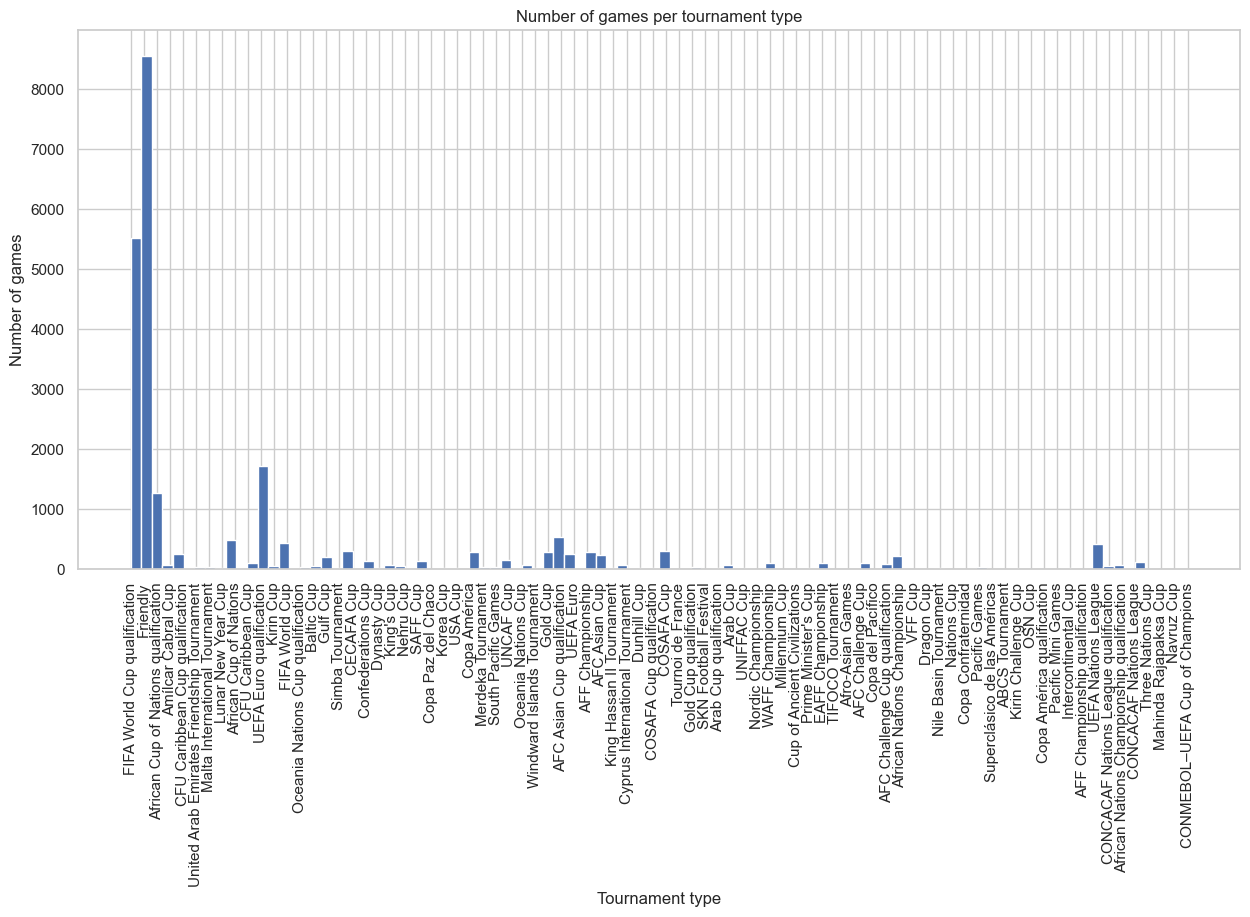

In [1939]:
fig, axs = plt.subplots(figsize = (15,7))
plt.xticks(rotation=90)
axs.hist(df['tournament'], bins = 100)
axs.set_title('Number of games per tournament type')
axs.set_xlabel('Tournament type')
axs.set_ylabel('Number of games')

#### Mexico winrate at home

Text(0, 0.5, 'Number of games')

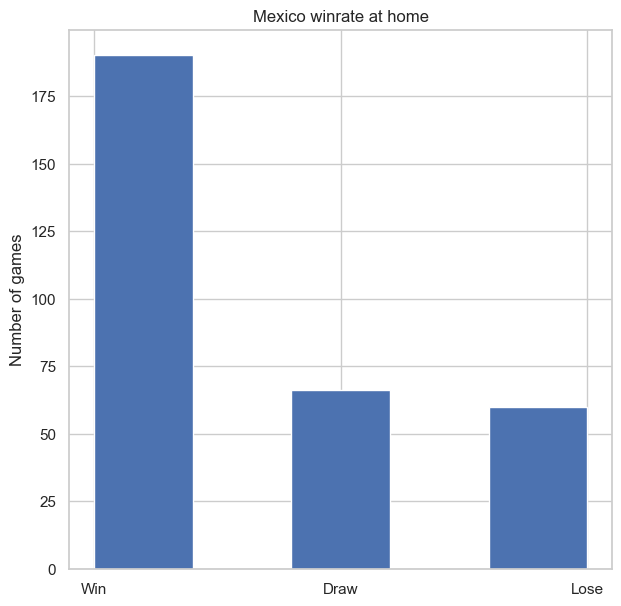

In [1940]:
home_mexico = df.query('home_team == "Mexico"')
fig, axs = plt.subplots(figsize = (7,7))
axs.hist(home_mexico['home_team_result'], bins = 5, width = 0.4)
axs.set_title('Mexico winrate at home')
axs.set_ylabel('Number of games')

#### Mexico winrate away

Text(0, 0.5, 'Number of games')

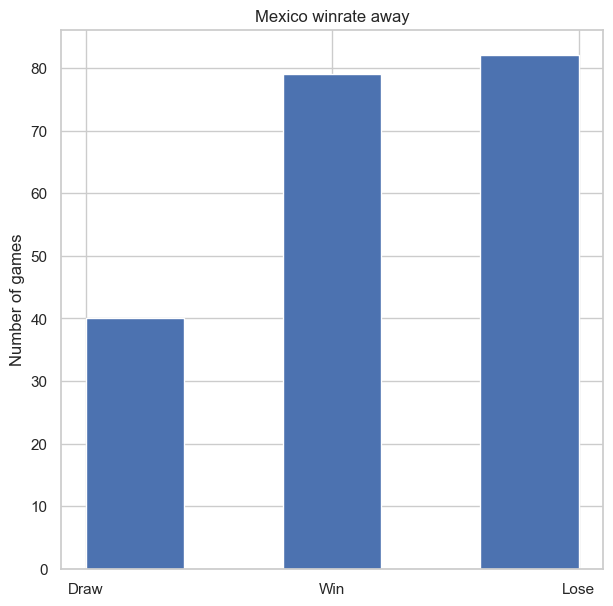

In [1941]:
away_mexico = df.query('away_team == "Mexico"')
fig, axs = plt.subplots(figsize = (7,7))
axs.hist(away_mexico['home_team_result'], bins = 5, width = 0.4)
axs.set_title('Mexico winrate away')
axs.set_ylabel('Number of games')

#### Mexico number of wins at home per year

Text(0.5, 0, 'year')

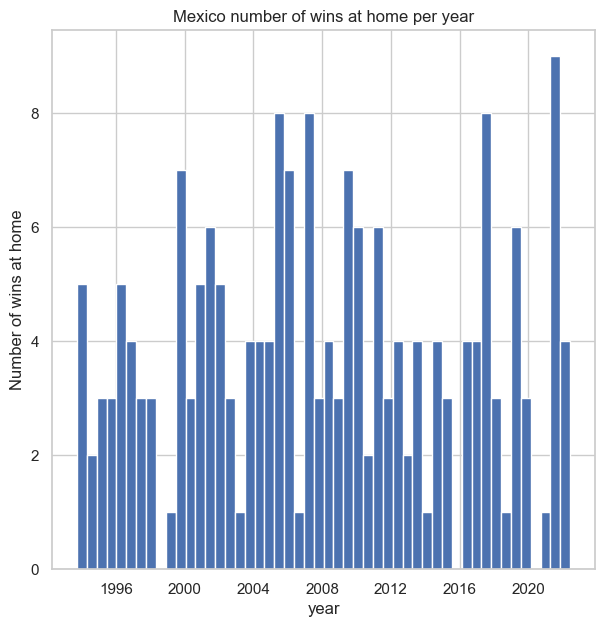

In [1942]:
home_mexico = df.query('home_team == "Mexico" and home_team_result == "Win"')
fig, axs = plt.subplots(figsize = (7,7))
axs.hist(home_mexico['date'], bins = 50)
axs.set_title('Mexico number of wins at home per year')
axs.set_ylabel('Number of wins at home')
axs.set_xlabel('year')

# 3. ML (continuous supervised learning) Regression 

#### Data to be compared

In [1943]:
var1 = 'home_team_goalkeeper_score'
var2 = 'home_team_mean_offense_score'

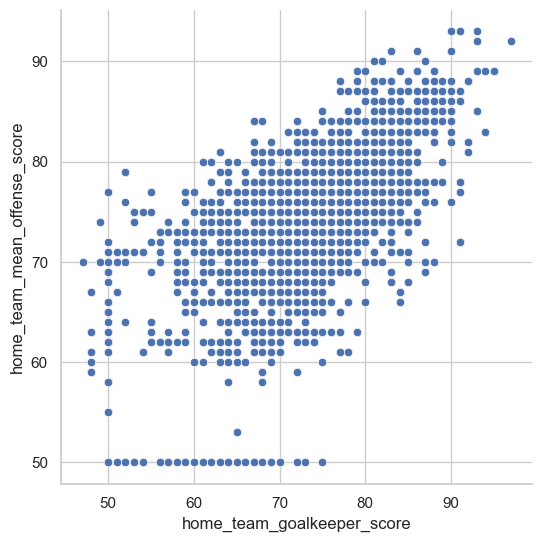

In [1944]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df, x_vars=[var1], y_vars=[var2], height=5.5);
plt.show()

/var/folders/1b/npwmtz1d4zlfgwtw12hwf2m00000gn/T/ipykernel_23301/1133581109.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(final_df.corr(), annot=True)


<AxesSubplot: >

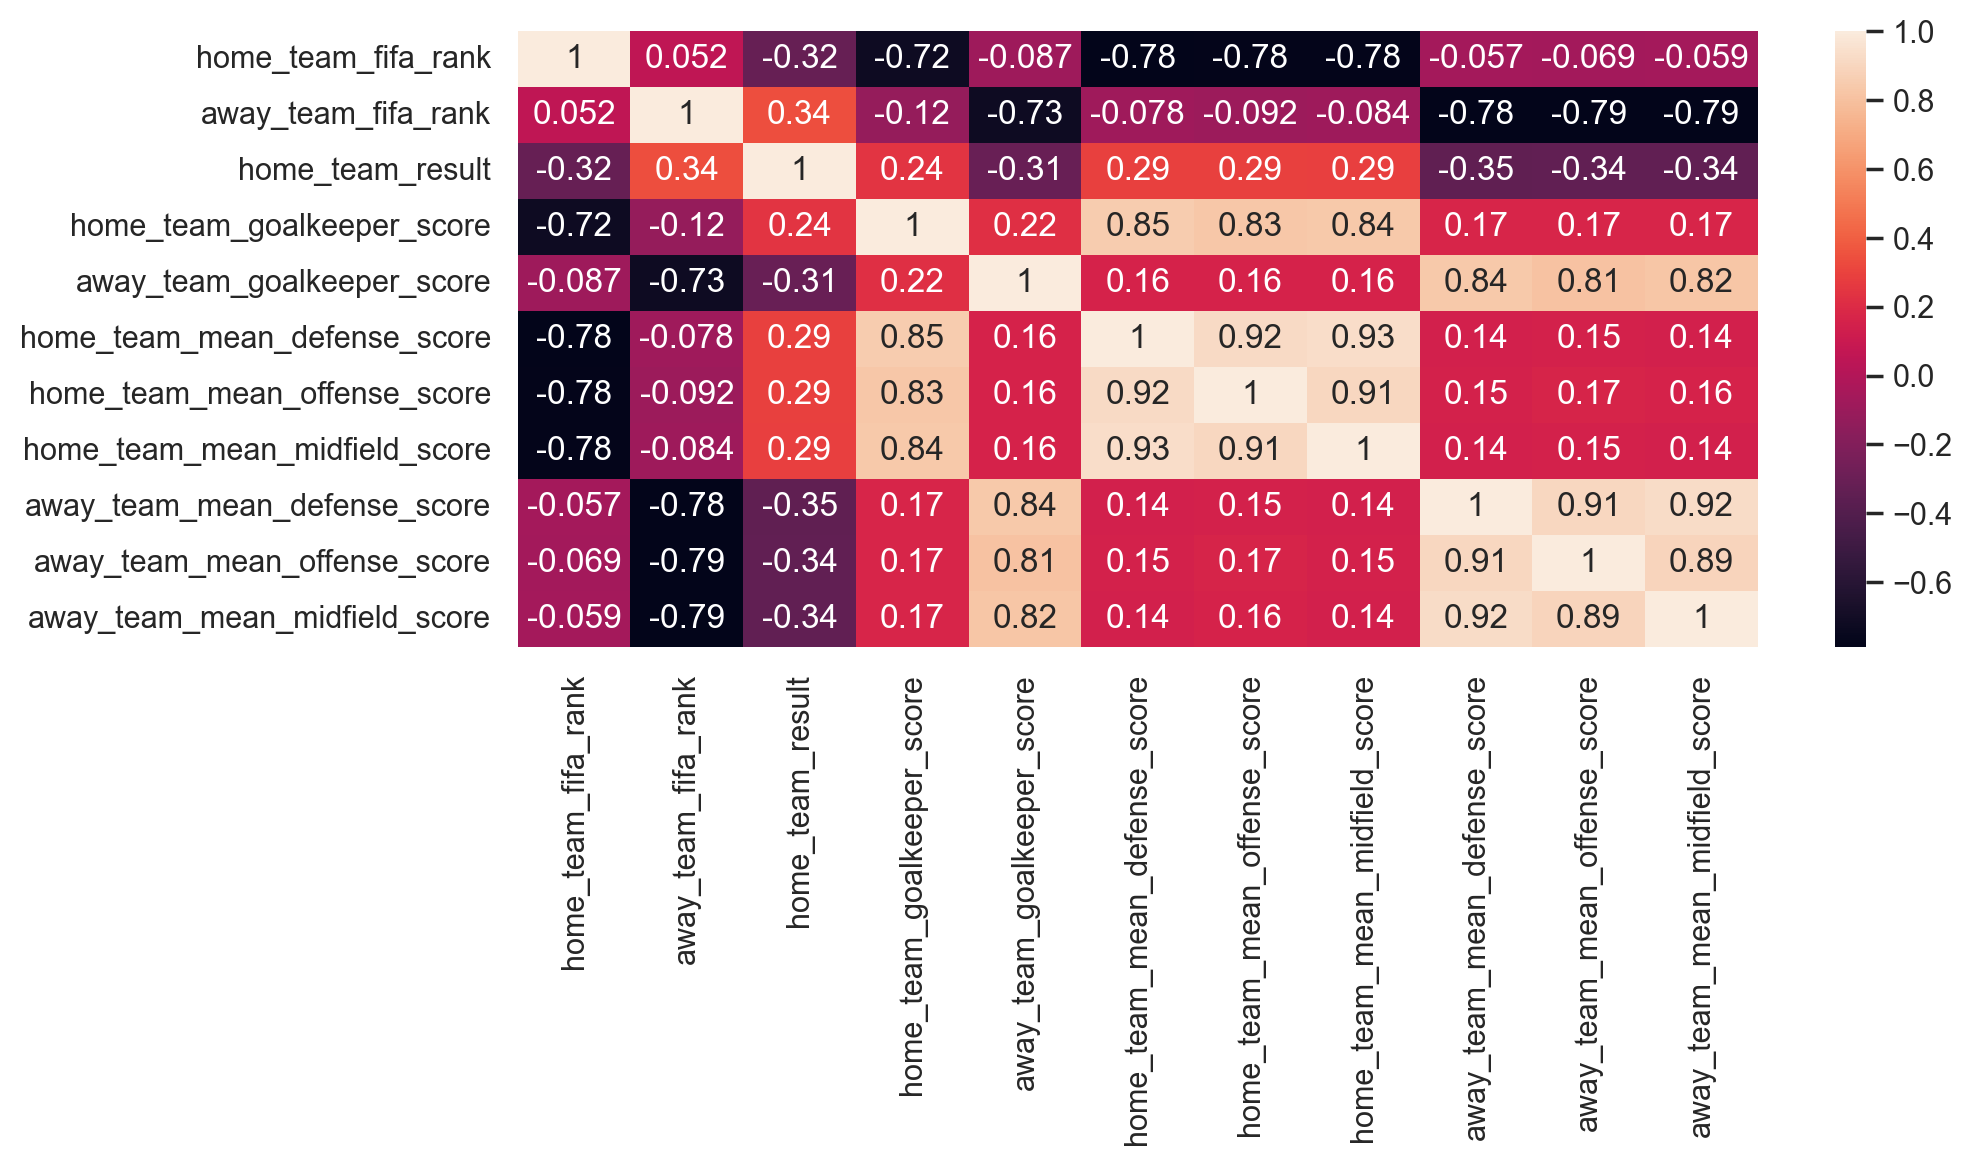

In [1945]:
plt.figure(figsize=(10, 4), dpi=200)
sns.heatmap(final_df.corr(), annot=True)

#### Preprocessing

In [1946]:
X = final_df[[var1]].values
y = final_df[var2].values

#### Splitting data

In [1947]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=0
)

#### Modeling

In [1948]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 0.822
Intercept: 13.464


#### Evaluation

In [1949]:
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)))

MSE train: 30.704, test: 30.498


In [1950]:
from sklearn.metrics import r2_score

print('R^2 train: %.3f, test: %.3f' % 
    (r2_score(y_train, y_train_pred),
    r2_score(y_test, y_test_pred)))

R^2 train: 0.694, test: 0.690


In [1951]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')    
    return None

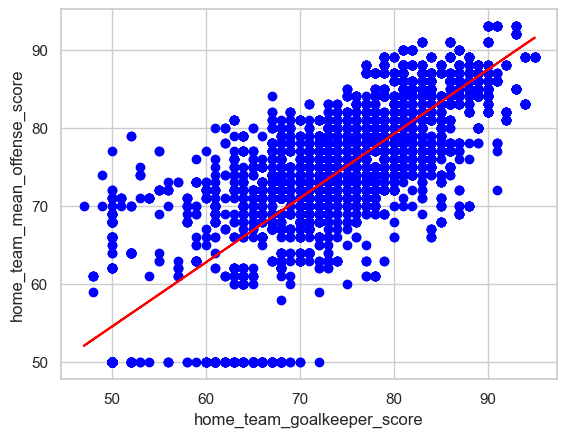

In [1952]:
lin_regplot(X, y, slr)
plt.xlabel(var1)
plt.ylabel(var2)
plt.show()

#### As we can see, this relation between goalkeeper score and offense score are stronlgy attatched, and it would make senese to the famous phrase "the best defense is a good offense" and opens the eternal debate for which one is more important to win a game, but in our situation we need to predict the result of a game, so with this logic we can't use linear regression. Thats why we now implement...

# Classification (decision tree)

In [1953]:
final_X = final_df[['home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_goalkeeper_score','away_team_goalkeeper_score', 'home_team_mean_defense_score','home_team_mean_offense_score', 'home_team_mean_midfield_score','away_team_mean_defense_score', 'away_team_mean_offense_score','away_team_mean_midfield_score']]
final_y = final_df['home_team_result']

In [1954]:
final_X.head(10)

,home_team_fifa_rank,away_team_fifa_rank,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,59,22,67.0,79.0,67.0,69.0,68.0,80.0,83.0,79.0
1,8,14,86.0,79.0,86.0,86.0,85.0,77.0,79.0,78.0
2,35,94,71.0,68.0,71.0,75.0,75.0,72.0,75.0,73.0
4,67,5,74.0,81.0,75.0,78.0,74.0,83.0,88.0,85.0
9,4,3,76.0,81.0,77.0,81.0,78.0,78.0,76.0,79.0
10,52,46,78.0,72.0,73.0,75.0,74.0,69.0,71.0,73.0
11,59,35,67.0,72.0,67.0,69.0,68.0,71.0,75.0,75.0
12,19,5,78.0,81.0,79.0,81.0,78.0,83.0,88.0,85.0
14,22,8,79.0,86.0,80.0,84.0,78.0,86.0,87.0,85.0
15,5,70,81.0,69.0,83.0,88.0,84.0,71.0,77.0,74.0


In [1955]:
final_y.head(10)

0     2
1     1
2     2
4     0
9     0
10    2
11    2
12    2
14    1
15    2
Name: home_team_result, dtype: int64

#### Splitting data

In [1956]:
from sklearn.model_selection import train_test_split

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(final_X, final_y, test_size=0.2, random_state = 42)

#### Training decision tree

In [1957]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=2, random_state = 42)
tree_clf.fit(final_X,final_y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

#### Evaluation

In [1958]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

y_pred = tree_clf.predict(X_test_final)
accuracy_score(y_test_final, y_pred)

0.5538873994638069

#### As we can see, we don't have a great accuracy, that's why we now implement...

# Random Forest

#### We drop unused columns for our new df

In [1959]:
data_matches_to_use = final_df.drop(['home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_goalkeeper_score','away_team_goalkeeper_score', 'home_team_mean_defense_score','home_team_mean_offense_score', 'home_team_mean_midfield_score','away_team_mean_defense_score', 'away_team_mean_offense_score','away_team_mean_midfield_score'], axis=1)
data_matches_to_use

,home_team,away_team,home_team_result
0,Bolivia,Uruguay,2
1,Brazil,Mexico,1
2,Ecuador,Venezuela,2
4,Paraguay,Argentina,0
9,Sweden,Switzerland,0
...,...,...,...
23908,Netherlands,Wales,2
23909,Poland,Belgium,0
23918,Chile,Ghana,0
23919,Japan,Tunisia,0


#### With the help of new data sets like this one where we can see the world cup winners.

In [1960]:
data_cups = pd.read_csv('WorldCups.csv')
data_cups['Attendance'] = data_cups['Attendance'].str.replace('.', '')
data_cups

/var/folders/1b/npwmtz1d4zlfgwtw12hwf2m00000gn/T/ipykernel_23301/3705226105.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_cups['Attendance'] = data_cups['Attendance'].str.replace('.', '')


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1563135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1603975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1865753


#### Countries and the Wolrd Cups winned.

In [1961]:
winners = data_cups['Winner'].map(lambda n: 'Germany' if n == 'Germany FR' else n).value_counts()
winners

Brazil       5
Italy        4
Germany      4
Uruguay      2
Argentina    2
England      1
France       1
Spain        1
Name: Winner, dtype: int64

#### Add this new columns to know how many world cups have won the teams in the match

In [1962]:
def winners_wc(df):
    if(winners.get(df['home_team']) != None):
        df['Home Team Champion'] = winners.get(df['home_team'])
    if(winners.get(df['away_team']) != None):
        df['Away Team Champion'] = winners.get(df['away_team'])
    return df

In [1963]:
data_matches_to_use["Home Team Champion"] = 0
data_matches_to_use["Away Team Champion"] = 0
data_matches_to_use = data_matches_to_use.apply(winners_wc, axis = 1)
data_matches_to_use

,home_team,away_team,home_team_result,Home Team Champion,Away Team Champion
0,Bolivia,Uruguay,2,0,2
1,Brazil,Mexico,1,5,0
2,Ecuador,Venezuela,2,0,0
4,Paraguay,Argentina,0,0,2
9,Sweden,Switzerland,0,0,0
...,...,...,...,...,...
23908,Netherlands,Wales,2,0,0
23909,Poland,Belgium,0,0,0
23918,Chile,Ghana,0,0,0
23919,Japan,Tunisia,0,0,0


#### We now change the way to view the results of a match, tie = 0, home team won = 1, home team loose = 2

In [1964]:
data_matches_to_use['Winner'] = '-'

In [1965]:
def match_winner(df):
    if (int(df['home_team_result']) == 1):
        df['Winner'] = 0
    elif(int(df['home_team_result']) == 2):
        df['Winner'] = 1
    else:
        df['Winner'] = 2
    
    return df

In [1966]:
data_matches_to_use = data_matches_to_use.apply(match_winner, axis = 1)
data_matches_to_use = data_matches_to_use.drop(['home_team_result'], axis=1)
data_matches_to_use

,home_team,away_team,Home Team Champion,Away Team Champion,Winner
0,Bolivia,Uruguay,0,2,1
1,Brazil,Mexico,5,0,0
2,Ecuador,Venezuela,0,0,1
4,Paraguay,Argentina,0,2,2
9,Sweden,Switzerland,0,0,2
...,...,...,...,...,...
23908,Netherlands,Wales,0,0,1
23909,Poland,Belgium,0,0,2
23918,Chile,Ghana,0,0,2
23919,Japan,Tunisia,0,0,2


#### Instead of a name we give an id to each team to have only numbers in our df

In [1967]:
team_name = {}
index = 0
for idx, row in data_matches_new.iterrows():
    name = row['home_team']
    if (name not in team_name.keys()):
        team_name[name] = index
        index += 1
        
    name = row['away_team']
    if (name not in team_name.keys()):
        team_name[name] = index
        index += 1

In [1968]:
def replace_name(df):
    df['home_team'] = team_name[df['home_team']]
    df['away_team'] = team_name[df['away_team']]
    return df

In [1969]:
Team_id = data_matches_new.apply(replace_name, axis = 1)
Team_id

,home_team,away_team,Home Team Champion,Away Team Champion,Winner
0,0,1,0,2,1
1,2,3,5,0,0
2,4,5,0,0,1
4,6,7,0,2,2
9,8,9,0,0,2
...,...,...,...,...,...
23908,37,53,0,0,1
23909,23,46,0,0,2
23918,28,67,0,0,2
23919,44,38,0,0,2


#### Training and testing

In [1970]:
X = Team_id.iloc[:, 0:4].values
y = Team_id.iloc[:, -1].values
X = np.array(X, dtype = 'f')
y = np.array(y, dtype = 'f')

from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

LabelEncoder_res=LabelEncoder()
y=LabelEncoder_res.fit_transform(y)

X, y = shuffle(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#### Scalling

In [1971]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#### Aplying random forest

In [1972]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
score_train_acc = rf.score(X_train, y_train)
score_test_acc = rf.score(X_test, y_test)

print(score_train_acc)
print(score_test_acc)

0.7513795217657878
0.513764747944226


#### As we can see, the accuracy for the train data was improved but the test didn't vary a lot with the decision tree. But we will use this to predict the matches.

# Now we predict the game results for the group mathces

In [1973]:
fixtures_wc = pd.read_csv('fixtures.csv')
fixtures_wc = fixtures_wc.drop(['Round Number', 'Date', 'Location', 'Result'], 1)

fixtures_wc

/var/folders/1b/npwmtz1d4zlfgwtw12hwf2m00000gn/T/ipykernel_23301/3362242015.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  fixtures_wc = fixtures_wc.drop(['Round Number', 'Date', 'Location', 'Result'], 1)


,Match Number,Home Team,Away Team,Group
0,1,Qatar,Ecuador,Group A
1,3,England,Iran,Group B
2,2,Senegal,Netherlands,Group A
3,4,USA,Wales,Group B
4,8,Argentina,Saudi Arabia,Group C
...,...,...,...,...
59,59,To be announced,To be announced,NaN
60,61,To be announced,To be announced,NaN
61,62,To be announced,To be announced,NaN
62,63,To be announced,To be announced,NaN


#### We will only predcit the group matches that's why we inly use the first 48 rows

In [1974]:
fix = fixtures_wc.loc[0:47, :]
fix

,Match Number,Home Team,Away Team,Group
0,1,Qatar,Ecuador,Group A
1,3,England,Iran,Group B
2,2,Senegal,Netherlands,Group A
3,4,USA,Wales,Group B
4,8,Argentina,Saudi Arabia,Group C
5,6,Denmark,Tunisia,Group D
6,7,Mexico,Poland,Group C
7,5,France,Australia,Group D
8,12,Morocco,Croatia,Group F
9,11,Germany,Japan,Group E


#### Function to give the probability between 2 teams

This function uses "rf" (random forest) to predict with the array given. The array contains id from team 1, id from team 2 and if they have won world cups, and then with the information of the previous matches results between the 2 teams the model returns the probabilities we need ('y' values).

In [1975]:
def gamePrediction(team1, team2):
  id1 = team_name[team1]
  id2 = team_name[team2]
  championship1 = winners.get(team1) if winners.get(team1) != None else 0
  championship2 = winners.get(team2) if winners.get(team2) != None else 0
  t = np.array([id1, id2, championship1, championship2]).astype('float64')
  t = np.reshape(t, (1,-1))
  y_rf = rf.predict_proba(t)[0]
  text = ('Probability for '+team1+' to win against '+team2+' is {}. \nProbability for '+team2+' to win against '+team1+' is {}. \nProbability for '+team1+' and '+team2+' draw is {}.').format(y_rf[1]*100, y_rf[2]*100, y_rf[0]*100)
  return y_rf, text

#### Funtcion to predict the games of a group

In [1976]:
def groupPrediction(group):
    for i in range(len(fix)):
        array = (fix['Group'] == group)
        index = []
        for ar in range(len(array)):
            if array[ar] == True:
                index.append(ar)
        
    for indx in range(len(index)):
        row = fix.loc[index[indx]] 
        probs, text = gamePrediction(row['Home Team'], row['Away Team'])
        print('Game: ', indx)
        print(text)    
        print('\n')

In [1977]:
groupPrediction('Group A')

Game:  0
Probability for Qatar to win against Ecuador is 14.000000000000002. 
Probability for Ecuador to win against Qatar is 41.0. 
Probability for Qatar and Ecuador draw is 45.0.


Game:  1
Probability for Senegal to win against Netherlands is 14.000000000000002. 
Probability for Netherlands to win against Senegal is 41.0. 
Probability for Senegal and Netherlands draw is 45.0.


Game:  2
Probability for Qatar to win against Senegal is 14.000000000000002. 
Probability for Senegal to win against Qatar is 41.0. 
Probability for Qatar and Senegal draw is 45.0.


Game:  3
Probability for Netherlands to win against Ecuador is 14.000000000000002. 
Probability for Ecuador to win against Netherlands is 41.0. 
Probability for Netherlands and Ecuador draw is 45.0.


Game:  4
Probability for Ecuador to win against Senegal is 14.000000000000002. 
Probability for Senegal to win against Ecuador is 41.0. 
Probability for Ecuador and Senegal draw is 45.0.


Game:  5
Probability for Netherlands to win